In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.font_manager as fm

In [3]:
from google.colab import files 
uploaded = files.upload()

Saving vgames2.csv to vgames2 (7).csv


In [4]:
import pandas as pd 

In [5]:
df = pd.read_csv('vgames2.csv',index_col=0)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [6]:
df['NA_Sales'] = df['NA_Sales'].replace({'[kK]': '*0.001', '[mM]': '*1'}, regex=True).map(pd.eval).astype(float)
df['EU_Sales'] = df['EU_Sales'].replace({'[kK]': '*0.001', '[mM]': '*1'}, regex=True).map(pd.eval).astype(float)
df['JP_Sales'] = df['JP_Sales'].replace({'[kK]': '*0.001', '[mM]': '*1'}, regex=True).map(pd.eval).astype(float)
df['Other_Sales'] = df['Other_Sales'].replace({'[kK]': '*0.001', '[mM]': '*1'}, regex=True).map(pd.eval).astype(float)

In [7]:
df=df.dropna()

In [8]:
def year(x):
  if (x >= 0) & (x < 20):
    return int(2000 + x)
  elif (x > 30) & (x < 1000):
    return int(1900 + x)
  else:
    return int(x)

df['Year'] = df['Year'].apply(year)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [9]:
df['sum_sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum_sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [10]:
df_genre = df.groupby(by=['Genre'])['sum_sales'].sum() 
df_genre = df_genre.reset_index() 
df_genre

,Genre,sum_sales
0,Action,1712.98
1,Adventure,234.02
2,Fighting,443.54
3,Misc,779.70
4,Platform,827.99
5,Puzzle,240.73
6,Racing,722.55
7,Role-Playing,901.51
8,Shooter,1024.75
9,Simulation,389.28


In [11]:
df_genre_na = df.groupby(by=['Genre'])['NA_Sales'].sum() 
df_genre_na = df_genre_na.reset_index()

df_genre_eu = df.groupby(by=['Genre'])['EU_Sales'].sum() 
df_genre_eu = df_genre_eu.reset_index()

df_genre_jp = df.groupby(by=['Genre'])['JP_Sales'].sum() 
df_genre_jp = df_genre_jp.reset_index()

df_genre_ot = df.groupby(by=['Genre'])['Other_Sales'].sum() 
df_genre_ot = df_genre_ot.reset_index()

In [12]:
df_genre = df_genre.combine_first(df_genre_na).combine_first(df_genre_eu).combine_first(df_genre_jp).combine_first(df_genre_ot) 
df_genre = df_genre.set_index("Genre")     

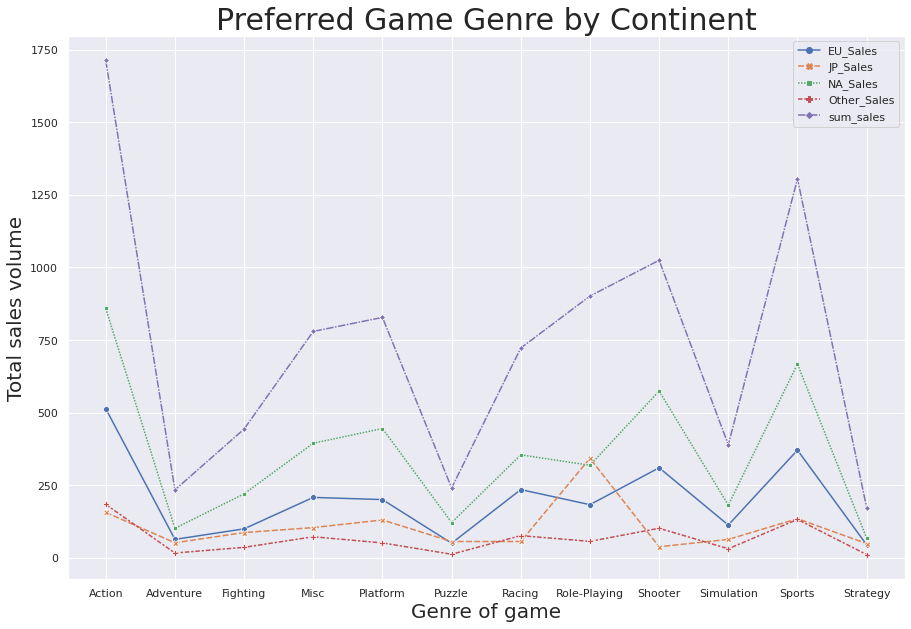

In [18]:
sns.set(style='darkgrid')
plt.figure(figsize=(15, 10))
plt.title("Preferred Game Genre by Continent", fontsize=30) 
plt.xlabel("Genre of game", fontsize=20)
plt.ylabel("Total sales volume", fontsize=20)
sns.lineplot(data=df_genre, markers=True);


In [19]:
df_years = df.groupby(['Year', 'Genre'])['sum_sales'].sum().reset_index()
df_years

,Year,Genre,sum_sales
0,1980,Action,0.34
1,1980,Fighting,0.77
2,1980,Misc,2.70
3,1980,Shooter,7.07
4,1981,Action,14.79
...,...,...,...
383,2016,Sports,14.63
384,2016,Strategy,0.52
385,2017,Action,0.01
386,2017,Role-Playing,0.04


In [20]:
df_years1 = df_years.groupby(by=['Year'])['sum_sales'].transform(max) == df_years['sum_sales']
df_years1

0      False
1      False
2      False
3       True
4       True
       ...  
383    False
384    False
385    False
386     True
387     True
Name: sum_sales, Length: 388, dtype: bool

In [21]:
df_years2 = df_years[df_years1].reset_index(drop=True)
df_years2

,Year,Genre,sum_sales
0,1980,Shooter,7.07
1,1981,Action,14.79
2,1982,Puzzle,10.04
3,1983,Platform,6.93
4,1984,Shooter,31.10
5,1985,Platform,43.17
6,1986,Action,13.74
7,1987,Fighting,5.42
8,1988,Platform,27.73
9,1989,Puzzle,37.75


Text(0, 0.5, 'Sum_sales')

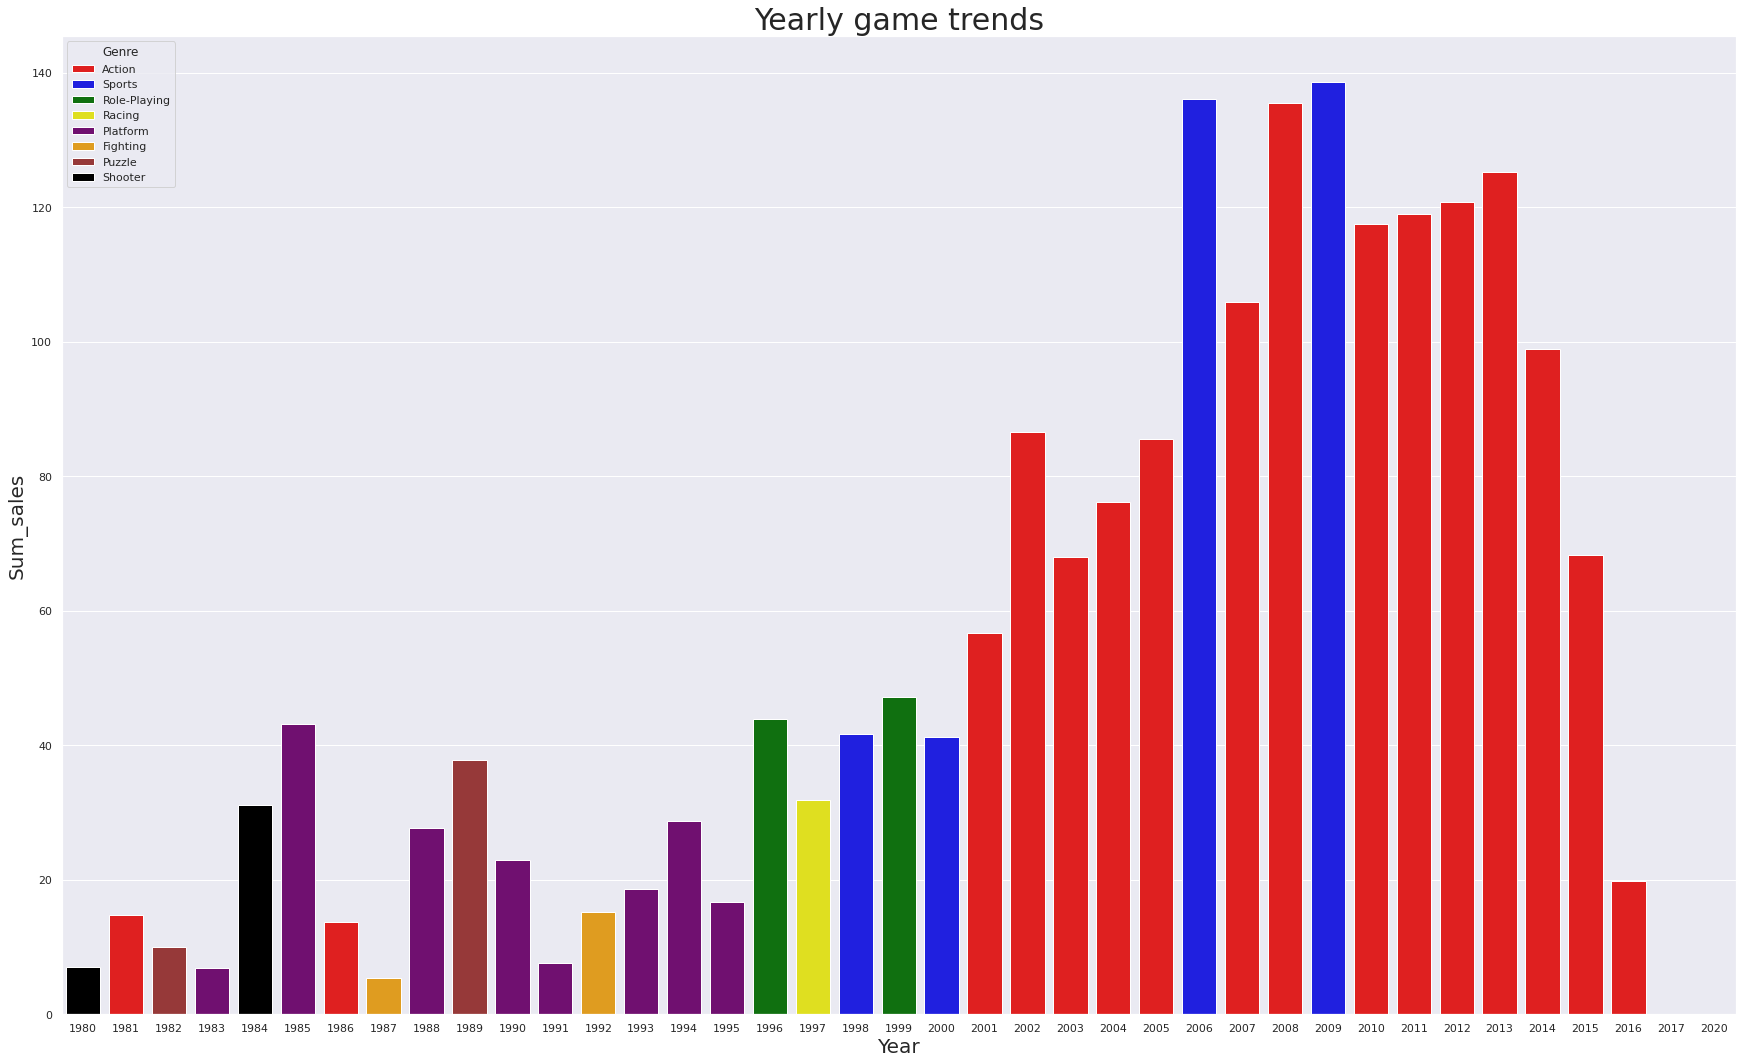

In [32]:
from pandas.core.arrays.categorical import contains
plt.figure(figsize=(30,18))

colors = ["red"]
sns.set_palette(sns.color_palette(colors))
year_barplot = sns.barplot(x='Year',y='sum_sales',hue='Genre', data=df_years2,hue_order=['Action'])
colors = ["blue"]
sns.set_palette(sns.color_palette(colors))
year_barplot = sns.barplot(x='Year',y='sum_sales',hue='Genre', data=df_years2,hue_order=['Sports'])
colors = ["green"]
sns.set_palette(sns.color_palette(colors))
year_barplot = sns.barplot(x='Year',y='sum_sales',hue='Genre', data=df_years2,hue_order=['Role-Playing'])
colors = ["yellow"]
sns.set_palette(sns.color_palette(colors))
year_barplot = sns.barplot(x='Year',y='sum_sales',hue='Genre', data=df_years2,hue_order=['Racing'])
colors = ["purple"]
sns.set_palette(sns.color_palette(colors))
year_barplot = sns.barplot(x='Year',y='sum_sales',hue='Genre', data=df_years2,hue_order=['Platform'])
colors = ["orange"]
sns.set_palette(sns.color_palette(colors))
year_barplot = sns.barplot(x='Year',y='sum_sales',hue='Genre', data=df_years2,hue_order=['Fighting'])
colors = ["brown"]
sns.set_palette(sns.color_palette(colors))
year_barplot = sns.barplot(x='Year',y='sum_sales',hue='Genre', data=df_years2,hue_order=['Puzzle'])
colors = ["black"]
sns.set_palette(sns.color_palette(colors))
year_barplot = sns.barplot(x='Year',y='sum_sales',hue='Genre', data=df_years2,hue_order=['Shooter'])


plt.title('Yearly game trends', fontsize=30)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Sum_sales', fontsize=20)

In [24]:
from scipy import stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

In [25]:
chi2_val, p, dof, expected= chi2_contingency(df_genre, correction=False)
if(p<0.05) : 
    print('p value:', p,"\n"+'귀무가설을 기각한다. 지역마다 선호하는 장르가 다르다.')
else :
    print('p value:', p,"\n"+'귀무가설을 기각하지 못한다. 지역마다 선호하는 장르가 같다.')

p value: 8.636920055864848e-116 
귀무가설을 기각한다. 지역마다 선호하는 장르가 다르다.


In [26]:
sales_top10 = df[df.Year > 2010].sort_values(by='sum_sales' ,ascending=False)
sales_top10 = sales_top10.head(10).reset_index(drop=True)
sales_top10

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum_sales
0,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
1,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
2,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
3,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
4,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.04
5,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25,4.30,0.07,1.12,13.74
6,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54,5.82,0.49,1.62,13.47
7,Mario Kart 7,3DS,2011,Racing,Nintendo,4.74,3.91,2.67,0.89,12.21
8,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99
9,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4.23,3.37,3.08,0.65,11.33


In [27]:
top10_platform = sales_top10.groupby(['Name','Year'])['sum_sales'].sum().reset_index()
top10_platform

,Name,Year,sum_sales
0,Call of Duty: Black Ops 3,2015,14.24
1,Call of Duty: Black Ops II,2012,27.78
2,Call of Duty: Modern Warfare 3,2011,28.23
3,Grand Theft Auto V,2013,37.77
4,Grand Theft Auto V,2014,11.99
5,Mario Kart 7,2011,12.21
6,Pokemon Omega Ruby/Pokemon Alpha Sapphire,2014,11.33


Text(0, 0.5, 'Sum_sales')

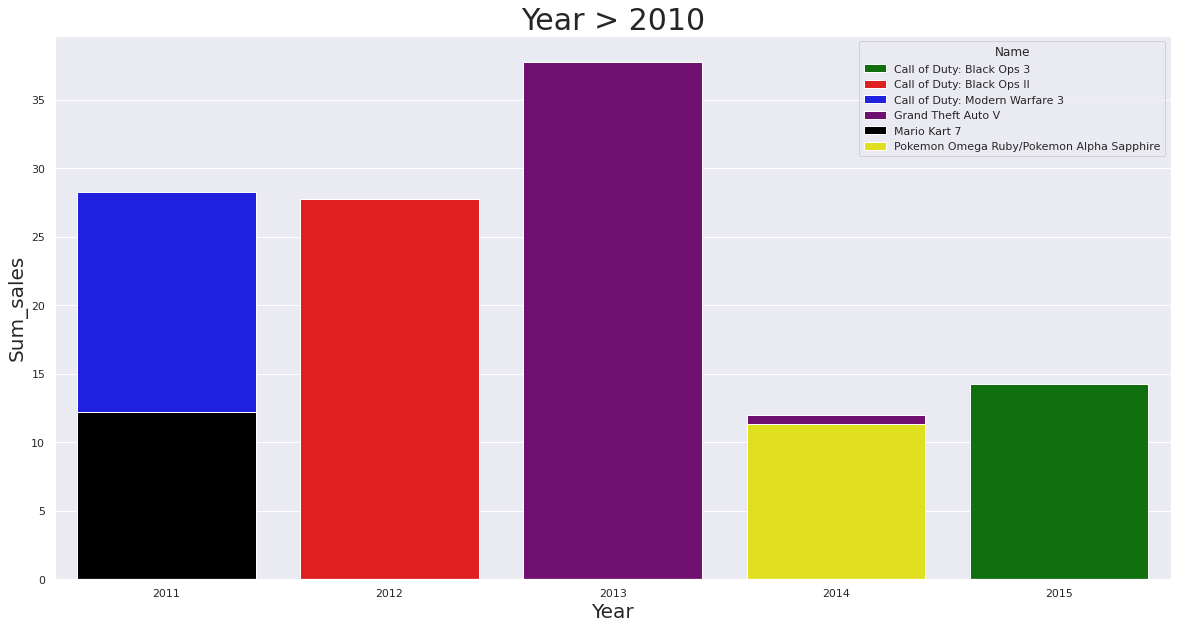

In [28]:
plt.figure(figsize=(20, 10))
colors = ["green"]
sns.set_palette(sns.color_palette(colors))
top10_platform_sales = sns.barplot(x ='Year', y='sum_sales',hue='Name' ,data=top10_platform,hue_order=['Call of Duty: Black Ops 3'])
colors = ["red"]
sns.set_palette(sns.color_palette(colors))
top10_platform_sales = sns.barplot(x ='Year', y='sum_sales',hue='Name' ,data=top10_platform,hue_order=['Call of Duty: Black Ops II'])
colors = ["blue"]
sns.set_palette(sns.color_palette(colors))
top10_platform_sales = sns.barplot(x ='Year', y='sum_sales',hue='Name' ,data=top10_platform,hue_order=['Call of Duty: Modern Warfare 3'])
colors = ["purple"]
sns.set_palette(sns.color_palette(colors))
top10_platform_sales = sns.barplot(x ='Year', y='sum_sales',hue='Name' ,data=top10_platform,hue_order=['Grand Theft Auto V'])
colors = ["black"]
sns.set_palette(sns.color_palette(colors))
top10_platform_sales = sns.barplot(x ='Year', y='sum_sales',hue='Name' ,data=top10_platform,hue_order=['Mario Kart 7'])
colors = ["yellow"]
sns.set_palette(sns.color_palette(colors))
top10_platform_sales = sns.barplot(x ='Year', y='sum_sales',hue='Name' ,data=top10_platform,hue_order=['Pokemon Omega Ruby/Pokemon Alpha Sapphire'])

plt.title('Year > 2010', fontsize=30)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Sum_sales', fontsize=20)

In [29]:
ssales_top10 = df[df.Year <= 2010].sort_values(by='sum_sales' ,ascending=False)
ssales_top10 = ssales_top10.head(10).reset_index(drop=True)
ssales_top10

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum_sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [30]:
ttop10_platform = ssales_top10.groupby(['Name','Year'])['sum_sales'].sum().reset_index()
ttop10_platform

,Name,Year,sum_sales
0,Duck Hunt,1984,28.31
1,Mario Kart Wii,2008,35.83
2,New Super Mario Bros.,2006,30.01
3,New Super Mario Bros. Wii,2009,28.61
4,Pokemon Red/Pokemon Blue,1996,31.38
5,Super Mario Bros.,1985,40.24
6,Tetris,1989,30.26
7,Wii Play,2006,29.01
8,Wii Sports,2006,82.74
9,Wii Sports Resort,2009,33.00


Text(0, 0.5, 'Sum_sales')

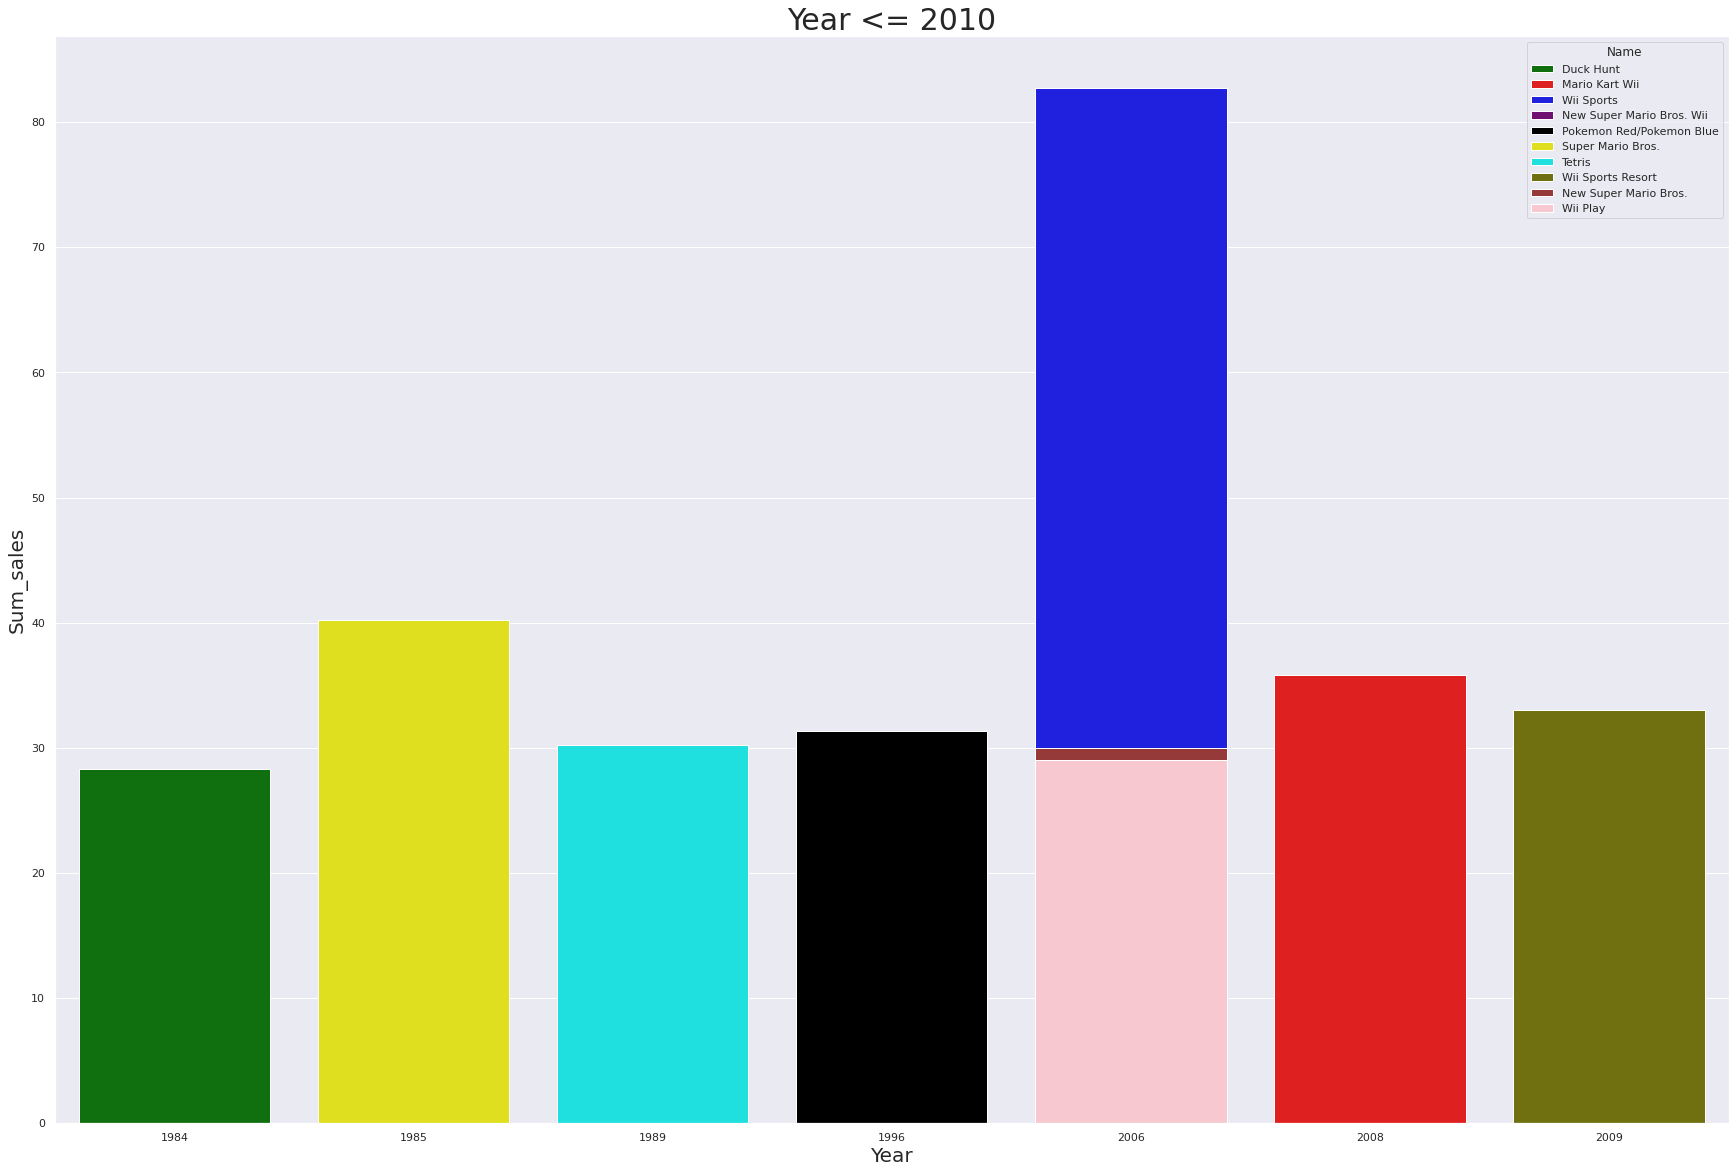

In [31]:
plt.figure(figsize=(30, 20))
colors = ["green"]
sns.set_palette(sns.color_palette(colors))
ttop10_platform_sales = sns.barplot(x ='Year', y='sum_sales',hue='Name' ,data=ttop10_platform,hue_order=['Duck Hunt'])

colors = ["red"]
sns.set_palette(sns.color_palette(colors))
ttop10_platform_sales = sns.barplot(x ='Year', y='sum_sales',hue='Name' ,data=ttop10_platform,hue_order=['Mario Kart Wii'])

colors = ["blue"]
sns.set_palette(sns.color_palette(colors))
ttop10_platform_sales = sns.barplot(x ='Year', y='sum_sales',hue='Name' ,data=ttop10_platform,hue_order=['Wii Sports'])

colors = ["purple"]
sns.set_palette(sns.color_palette(colors))
ttop10_platform_sales = sns.barplot(x ='Year', y='sum_sales',hue='Name' ,data=ttop10_platform,hue_order=['New Super Mario Bros. Wii'])

colors = ["black"]
sns.set_palette(sns.color_palette(colors))
ttop10_platform_sales = sns.barplot(x ='Year', y='sum_sales',hue='Name' ,data=ttop10_platform,hue_order=['Pokemon Red/Pokemon Blue'])

colors = ["yellow"]
sns.set_palette(sns.color_palette(colors))
ttop10_platform_sales = sns.barplot(x ='Year', y='sum_sales',hue='Name' ,data=ttop10_platform,hue_order=['Super Mario Bros.'])

colors = ["cyan"]
sns.set_palette(sns.color_palette(colors))
ttop10_platform_sales = sns.barplot(x ='Year', y='sum_sales',hue='Name' ,data=ttop10_platform,hue_order=['Tetris'])

colors = ["olive"]
sns.set_palette(sns.color_palette(colors))
ttop10_platform_sales = sns.barplot(x ='Year', y='sum_sales',hue='Name' ,data=ttop10_platform,hue_order=['Wii Sports Resort'])

colors = ["brown"]
sns.set_palette(sns.color_palette(colors))
ttop10_platform_sales = sns.barplot(x ='Year', y='sum_sales',hue='Name',data=ttop10_platform,hue_order=['New Super Mario Bros.'])

colors = ["pink"]
sns.set_palette(sns.color_palette(colors))
ttop10_platform_sales = sns.barplot(x ='Year', y='sum_sales',hue='Name' ,data=ttop10_platform,hue_order=['Wii Play'])
 

plt.title('Year <= 2010', fontsize=30)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Sum_sales', fontsize=20)